**Spencer Plovie, V00886526**

# Numerical Problem

Let two particles ($ m_1=m_2=1kg $) repel each other with equal and opposite forces given by:

$$ F_{12} = k\frac{b^2}{r^2}r_12=-F_{21} $$

where $ b=1m $ and $ k=1N $. Assume the initial positions of $m_1$ and $m_2$ are given by $(x_1,y_1)_o=(0,-0.5)m$. Initial velocity of $m_1$ is 10m/s in +x direction, $m_2$ is at rest. Numerically integrate the equations of motion for these two particles undergoing this 2D collision.


**a)** Plot their trajectories up to a point where their distance of separation is 10m.

**b)** Measure scattering angle of incident particle and recoil angle of scattered particle. Is the sum of the two angles equal to 9o degrees?

**c)** What is the vector sum of their final momenta? Is it equal to initial momentum of incident particle?

In [1]:
# Populate interactive namespace with functions
# from modules numpy and matplotlib
%pylab nbagg

rcParams['lines.linewidth'] = 2 # Thickens plotted lines

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Following commands allow us to produce
# a nice PDF versio of the notebook
# with figures
from matplotlib.pyplot import *
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [3]:
# Function defining RHS of the ODEs
def dz_dt(z, t, m1, m2, k, b):
    z1, z2, z3, z4, z5, z6, z7, z8 = z
    # Special care should be taken here to avoid
    # a situation of close encounter, when r21=0
    # in the denominator
    r21 = sqrt((z5-z1)**2 + (z7-z3)**2)
    eps = 1e-6
    if r21 < eps:
        r21 = eps
    fac = (k*b**2)/r21**3
    dzdt = [z2, -fac*(z5-z1)/m1, z4, -fac*(z7-z3)/m1,\
            z6, fac*(z5-z1)/m2, z8, fac*(z7-z3)/m2]
    return dzdt

**Part a)**

In [4]:
m1 = 1 #kg
m2 = 1 #kg
b = 1 #Impact parameter, distance in metres
k = 1 #gravitational force constant in Newtons

# Initial conditions

# m1 initial coordinates and velocity components
x_init1 = -10. #metres, m
y_init1 = 0.5 #m
vx_init1 = 10. #m/s
vy_init1 = 0. #m/s

# m2 initial coordinates and velocity components
x_init2 = 0. #m
y_init2 = -0.5 #m
vx_init2 = 0. #m/s
vy_init2 = 0. #m/s

z0 = [x_init1,vx_init1,y_init1,vy_init1,x_init2,vx_init2,y_init2,vy_init2]

In [5]:
# Populate the interactive namespace with the function
# that solves ODEs
from scipy.integrate import odeint

In [6]:
# Integration time interval
t_start = 0.
t_end = 2 #Adjust t_end using plot below
dt = 10000 #Number of integration time steps

t = linspace(t_start, t_end, dt)

In [7]:
# Solve the ODEs
# values of the parameters m1, m2, k, and b
# are defined above
sol = odeint(dz_dt, z0, t, args=(m1,m2,k,b))

In [1]:
# The equation used to calculate the separation distance is 
# r_21 = sqrt((z_5-z_1)^2+(z_7-z_3)^2). In order to obtain a 
# separation distance of 10m, the value of t_end was adjusted 
# until the desired r-value was obtained. 

In [8]:
r = sqrt((sol[:,4]-sol[:,0])**2 + (sol[:,6]-sol[:,2])**2)
print(r)

[10.04987562 10.04788535 10.04589508 ... 10.00617299 10.00816316
 10.01015334]


Text(0.5, 1.0, 'Trajectories of the Two Colliding Particles')

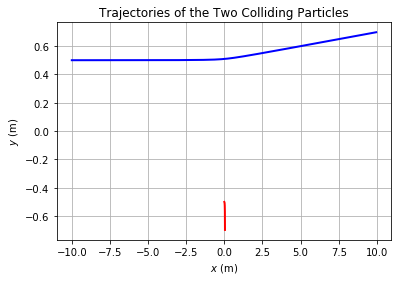

In [9]:
# Plotting the trajectories of m1 and m2
figure(1)

plot(sol[:,0], sol[:,2], 'b')
plot(sol[:,4], sol[:,6], 'r')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("Trajectories of the Two Colliding Particles")

**Part b)**

The figure above in part a) indicates that the particles move in staright-line trajectories after impact. By using a segment of each particle's slope after deflection near the end of the time interval, this ensures that the curved part of each mass's slope doesn't alter the angle in an undesirable way. The formula used to calculate the slope for each trajectory is as follows:

$$ slope = \frac{y_f-y_i}{x_f-x_i} $$

From here, the scattering angle was calculated using the equation:

$$ \theta_{scatter} = tan^{-1}(slope) $$

These equations were both used twice, once for each particle trajectory.

In [10]:
slope_1 = (sol[9900,2] - sol[9500,2])/(sol[9900,0] - sol[9500,0])
# 2 = y_init1, 0 = x_init1
slope_2 = (sol[9900,6] - sol[9500,6])/(sol[9900,4] - sol[9500,4])
# 6 = y_init2, 4 = x_init2

theta_1 = 180*arctan(slope_1)/pi 
# 180/pi converts rads to degrees
theta_2 = abs(180*arctan(slope_2)/pi)

print('Scattering angle for particle 1 (red line): \
%.3f' % (theta_1) , "degrees")
print('Scattering angle for particle 2 (blue line): \
%.3f' % (theta_2) , "degrees")

Scattering angle for particle 1 (red line): 1.137 degrees
Scattering angle for particle 2 (blue line): 88.667 degrees


In [11]:
theta_scatter = theta_1 + theta_2
print('Sum of the scattering angles: \
%.3f' % (theta_scatter) , "degrees")

Sum of the scattering angles: 89.805 degrees


The sum of the two angles, $\theta_1$ and $\theta_2$, shows that their sum is approximately equal to $90^\circ$, which is what we expected.

**Part c)**

The vector sum of the final momentum of each particle is given the formula as follows:
$$ p = mv = m\sqrt{v_x^2 + v_y^2} $$

For each particle with its own momentum, ie. $p_1 = m_1v_1$ and $p_2 = m_2v_2$.

In [12]:
p1_f = m1*sqrt(sol[9900,1]**2 + sol[9900,3]**2)
# 1 = vx_init1, 3 = vy_init1
p2_f = m1*sqrt(sol[9900,5]**2 + sol[9900,7]**2)
# 5 = vx_init2, 7 = vy_init2

ptot_f = p1_f + p2_f
print("The total final momentum for both particles is: \
%.1f" % (ptot_f) , "Newton-seconds (Ns)")


The total final momentum for both particles is: 10.2 Newton-seconds (Ns)


In [13]:
# Particle 1 started from rest, so the initial momentum for
# it is p1_i = 0 Ns, leaving the total initial momentume being
# equal to the momentum from p2_i

ptot_i = m1*(-x_init1)
print ("The total initial momentum of the system is: \
" , ptot_i , "Ns")

The total initial momentum of the system is:  10.0 Ns


The total initial momentum, $p_{initial} = 10.0 Ns$, is approximately equal to the total final momentum, $p_{final} = 10.2 Ns$. Given this, we can conclude that the sum of the total final momenta of the particles is equal to the total initial momenta by the vector sum of each particle's components.